In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [39]:
data= pd.read_csv("BIO-TECH_STOCK_DATA.CSV")
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,0,2019-02-11,8050.00,8050.00,7600.00,7666.40,7446.035,2.142e+04,ABBOTINDIA.NS
1,1,2019-02-12,7700.10,7787.00,7640.00,7754.55,7531.651,5.889e+03,ABBOTINDIA.NS
2,2,2019-02-14,7684.25,7693.85,7465.35,7644.75,7425.008,5.685e+03,ABBOTINDIA.NS
3,3,2019-02-15,7721.20,7721.20,7400.00,7442.45,7228.522,5.351e+03,ABBOTINDIA.NS
4,4,2019-02-18,7500.00,7500.00,7211.00,7264.20,7055.397,2.938e+03,ABBOTINDIA.NS
...,...,...,...,...,...,...,...,...,...
119974,752,2022-02-02,8.48,8.57,7.65,7.86,7.860,1.505e+06,ZYME
119975,753,2022-02-03,7.79,7.99,7.40,7.49,7.490,1.452e+06,ZYME
119976,754,2022-02-04,7.47,8.05,7.41,7.95,7.950,1.132e+06,ZYME
119977,755,2022-02-07,7.90,8.33,7.83,7.96,7.960,5.318e+05,ZYME


In [40]:
data = data.pivot(index='Date', columns='ticker', values = 'Adj Close')
data.head(5)

ticker,ABBOTINDIA.NS,ABCL,ABCM,ABOS,ACAD,ACRS,ADCT,ADPT,AGIO,AJANTPHARM.NS,...,VIGL,VIR,VOR,VRTX,VTYX,XBIT,XLO,YMAB,ZEAL,ZYME
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-08,NaN,NaN,NaN,NaN,21.99,7.01,NaN,NaN,53.36,NaN,...,NaN,NaN,NaN,181.34,NaN,7.290,NaN,20.69,14.000,15.56
2019-02-11,7446.035,NaN,NaN,NaN,21.48,6.79,NaN,NaN,54.08,979.148,...,NaN,NaN,NaN,181.53,NaN,7.453,NaN,21.12,14.270,15.57
2019-02-12,7531.651,NaN,NaN,NaN,22.39,7.17,NaN,NaN,54.79,984.860,...,NaN,NaN,NaN,184.01,NaN,7.238,NaN,21.72,14.320,15.45
2019-02-13,NaN,NaN,NaN,NaN,22.31,6.99,NaN,NaN,54.03,NaN,...,NaN,NaN,NaN,185.25,NaN,7.091,NaN,21.71,14.301,15.75
2019-02-14,7425.008,NaN,NaN,NaN,21.93,7.44,NaN,NaN,57.42,960.451,...,NaN,NaN,NaN,185.72,NaN,7.583,NaN,21.42,14.700,15.51


In [41]:
pd.set_option('precision', 3)
data.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
ABBOTINDIA.NS,739.0,14252.823,3882.403,6984.349,12184.235,15162.532,16393.025,23184.500
ABCL,292.0,24.565,11.772,7.770,15.490,20.275,31.310,58.900
ABCM,327.0,20.610,1.735,16.560,19.280,20.430,22.210,24.300
ABOS,154.0,12.386,4.748,4.790,7.048,14.415,15.838,20.280
ACAD,757.0,34.286,12.153,15.780,23.600,29.870,45.010,57.000
ACRS,757.0,8.274,7.936,0.750,1.730,4.650,15.000,29.600
ADCT,437.0,29.548,8.157,14.670,23.300,27.880,34.160,51.050
ADPT,661.0,37.936,10.333,14.360,30.080,37.640,43.340,67.740
AGIO,757.0,45.920,8.630,28.740,38.900,46.420,51.910,68.100


In [42]:
#Calculate returns and create a data frame
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(266)

data = returns
data.head()

,returns,volatility
ticker,,
ABBOTINDIA.NS,0.293,0.287
ABCL,-1.281,0.845
ABCM,-0.035,0.375
ABOS,-1.949,0.662
ACAD,0.301,0.718


In [43]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

,returns,volatility
ticker,,
ABBOTINDIA.NS,0.366,-1.469
ABCL,-2.189,0.189
ABCM,-0.167,-1.208
ABOS,-3.275,-0.353
ACAD,0.379,-0.189


In [ ]:
X_train,X_test =

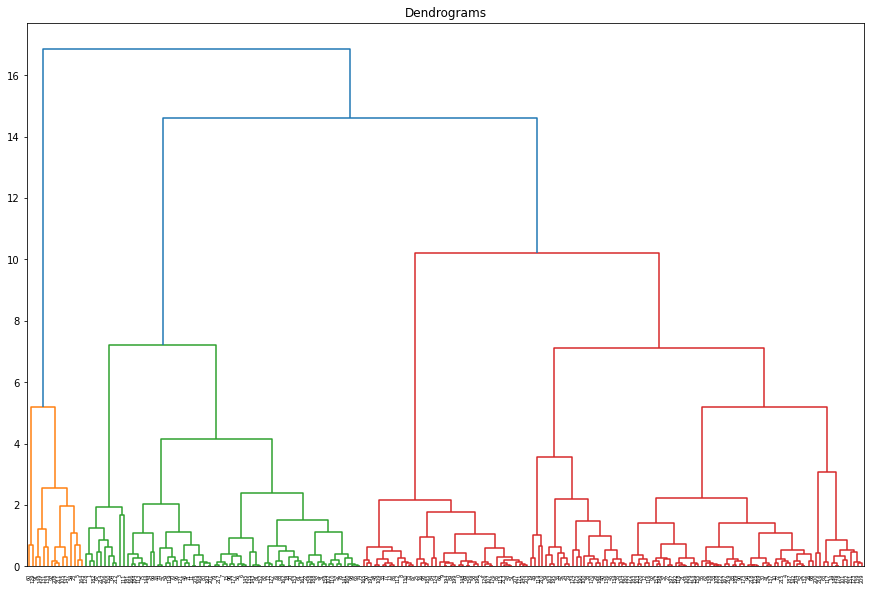

In [44]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

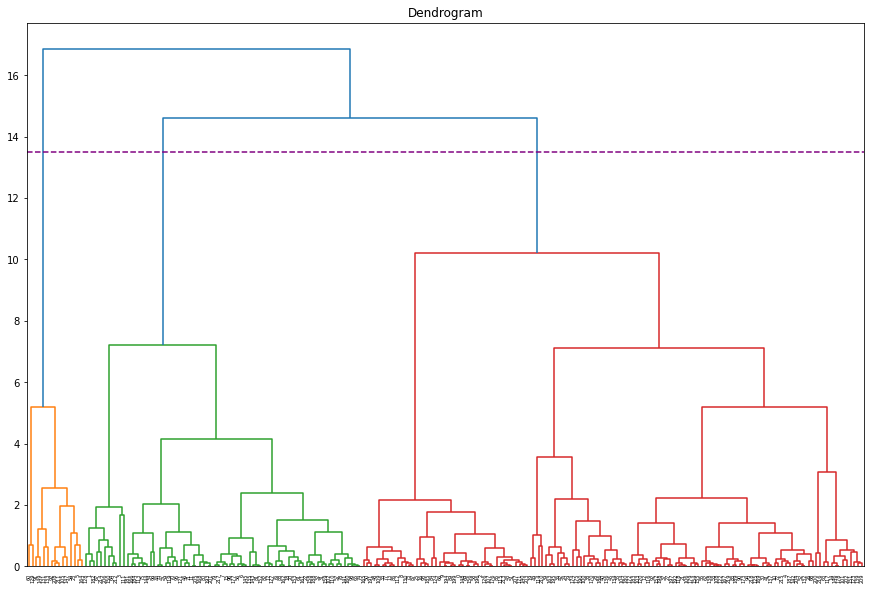

In [45]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=13.5, color='purple', linestyle='--')

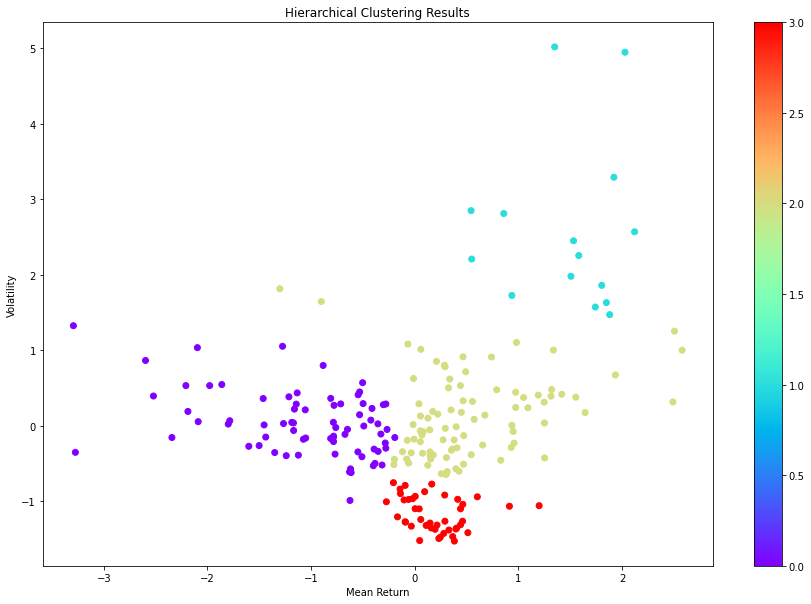

In [46]:
#Fit the model
clusters = 4
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

In [49]:
X


,returns,volatility
ticker,,
ABBOTINDIA.NS,0.366,-1.469
ABCL,-2.189,0.189
ABCM,-0.167,-1.208
ABOS,-3.275,-0.353
ACAD,0.379,-0.189
...,...,...
XBIT,0.472,-0.132
XLO,-0.902,1.646
YMAB,-0.354,-0.340


In [50]:
Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(X)

In [51]:
y_hc

array([3, 4, 3, 4, 0, 1, 2, 2, 3, 3, 0, 2, 0, 3, 0, 2, 3, 2, 2, 0, 2, 0,
       2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       2, 0, 2, 2, 3, 0, 3, 3, 0, 0, 1, 0, 2, 2, 3, 2, 1, 2, 0, 0, 4, 2,
       3, 4, 0, 3, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3,
       2, 3, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 3, 0, 3,
       2, 4, 3, 2, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 4, 1, 3, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 0, 1, 3, 1, 4, 0, 2, 2,
       0, 0, 3, 0, 2, 2, 2, 2, 2, 0, 1, 3, 2, 0, 2, 0, 0, 3, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 2, 4, 0, 2, 3, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0, 3, 0,
       0, 3, 0, 2, 0, 3, 0, 2, 4, 3, 1, 0, 0, 1, 4, 3, 4, 0, 0, 2, 0, 0],
      dtype=int64)

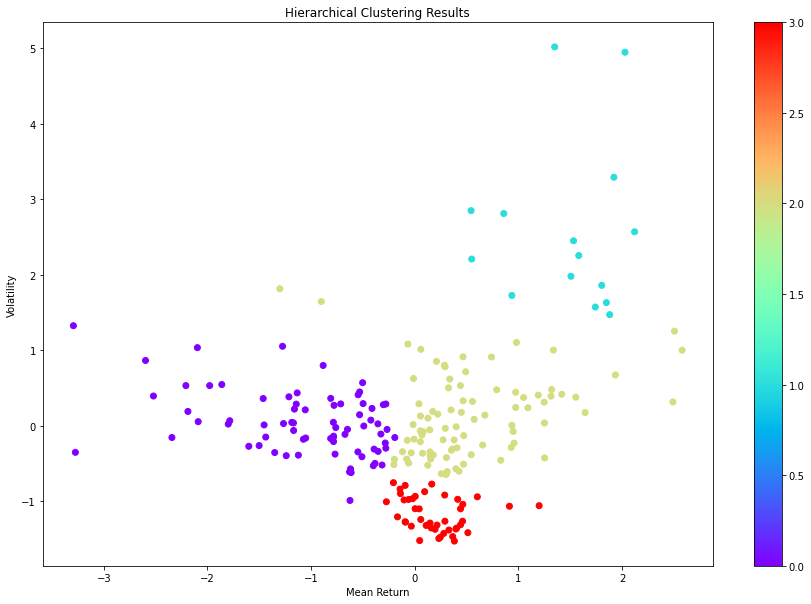

In [52]:
#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

In [53]:
data['Cluster_Labels'] = y_hc
data.head()

,returns,volatility,Cluster_Labels
ticker,,,
ABBOTINDIA.NS,0.293,0.287,3
ABCL,-1.281,0.845,4
ABCM,-0.035,0.375,3
ABOS,-1.949,0.662,4
ACAD,0.301,0.718,0


In [68]:
from sklearn.metric import metric
print("Hierarchical Clustering", metrics.silhouette_score(y_hc, metric='euclidean'))


ModuleNotFoundError: No module named 'sklearn.metric'